In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
df=pd.read_csv('Titanic-Dataset.csv')

In [272]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [273]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [274]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.925,NaN,S


Numerical data - PassengerId,Age,Ticket,Fare

categorical data - Survived,Pclass,Sex,SibSp,Parch,Embarked
mixed data - Name 

In [275]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# cleaning the data

Remove column which is not useful

In [277]:
df=df.drop(columns=['PassengerId','Cabin','Name','Ticket','Fare'])

In [278]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [280]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [281]:
df.duplicated().sum()

np.int64(306)

first remove null and duplicated value 

Remove duplicates

In [282]:
df=df.drop_duplicates()

In [283]:
df.duplicated().sum()

np.int64(0)

Remove Null value from age column

In [284]:
mean=df['Age'].mean()

In [285]:
mean

np.float64(30.089335793357932)

In [286]:
df['Age']=df['Age'].fillna(mean)

In [287]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

Remove Null value from Embarked column

In [288]:
df['Embarked'].value_counts()

Embarked
S    415
C    131
Q     37
Name: count, dtype: int64

In [289]:
mode=df['Embarked'].mode()[0]

In [290]:
mode

'S'

In [291]:
df['Embarked']=df['Embarked'].fillna(mode)

In [292]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
885    Q
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 585, dtype: object

In [293]:
df['Embarked'].isna().sum()

np.int64(0)

In [294]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Analysing The data with survived column

In [295]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


Use univarient  Analysis

In [296]:
df['Survived'].value_counts() # 0 - dead ,1- survived

Survived
0    309
1    276
Name: count, dtype: int64

<Axes: xlabel='Survived'>

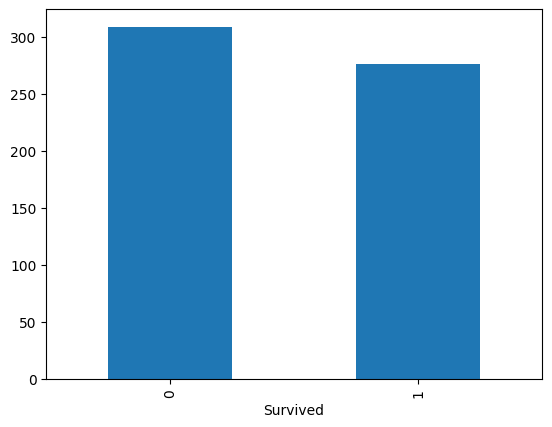

In [297]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

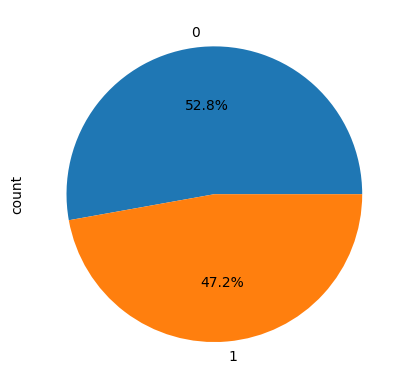

In [298]:
df['Survived'].value_counts().plot(kind='pie',autopct="%1.1f%%")

conclusion :-Out of the total passengers, approximately 47.2% survived while 52.8% did not.

Analysis survived col with res to other col- use bivarient analysis

Survived vs Sex - both categorical data(categorical - categorical analysis)

In [299]:
Sur_Gen=pd.crosstab(df['Survived'],df['Sex'])

In [300]:
Sur_Gen

Sex,female,male
Survived,,
0,71,238
1,186,90


<Axes: xlabel='Sex'>

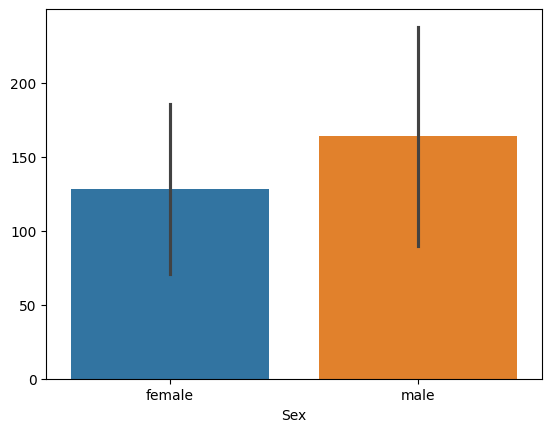

In [301]:
sns.barplot(Sur_Gen)

<Axes: xlabel='Sex', ylabel='Survived'>

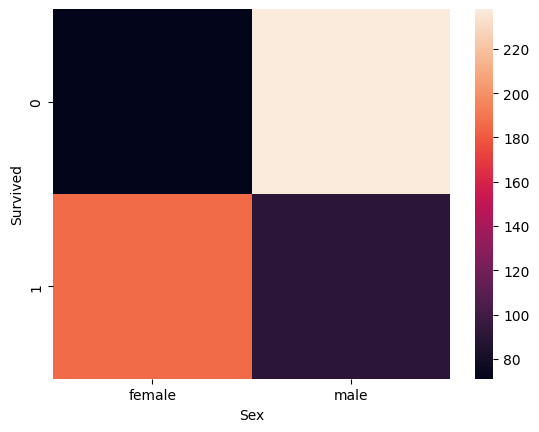

In [302]:
sns.heatmap(Sur_Gen)

conclusion :- Out of the total passengers compare with sex , we get that female survived more than male.

# Survived vs Embarked

In [310]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,41.221374,64.864865,55.395683
1,58.778626,35.135135,44.604317


In [311]:

Sur_Emb=pd.crosstab(df['Survived'],df['Embarked'])

In [312]:
Sur_Emb

Embarked,C,Q,S
Survived,,,
0,54,24,231
1,77,13,186


<Axes: xlabel='Embarked'>

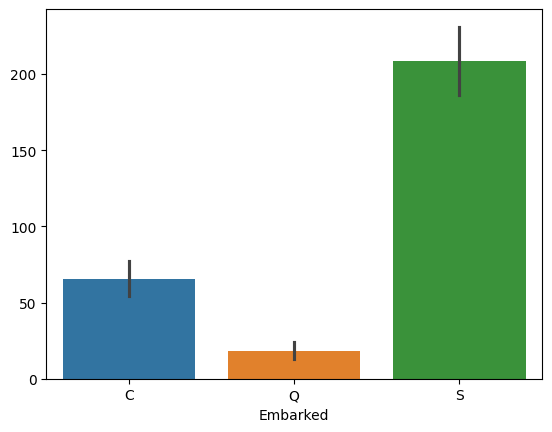

In [313]:
sns.barplot(Sur_Emb)

<Axes: xlabel='Embarked', ylabel='Survived'>

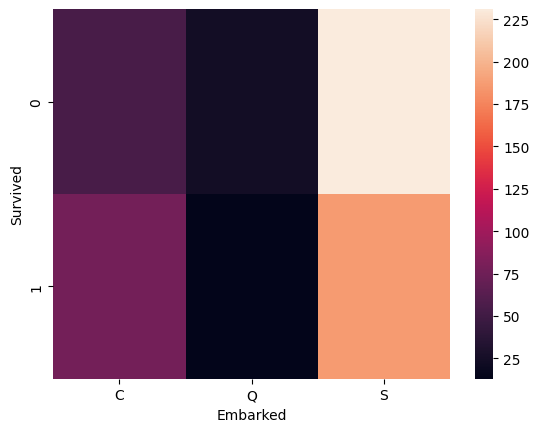

In [314]:
sns.heatmap(Sur_Emb)

conclusion :- Out of the total passengers compare with Survived vs Embarked ,c class is more survived than other class.

In [316]:
#Survived and pclass - both column are categorical 
data=pd.crosstab(df['Survived'],df['Pclass'])

In [317]:
data

Pclass,1,2,3
Survived,,,
0,59,65,185
1,112,79,85


<Axes: xlabel='Pclass', ylabel='Survived'>

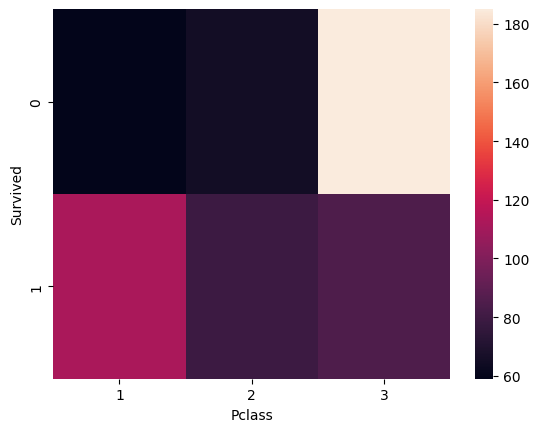

In [318]:
sns.heatmap(data)

conclusion :- Out of the total passengers compare with Survived vs Pclass ,1 pclass is more safe  than other class

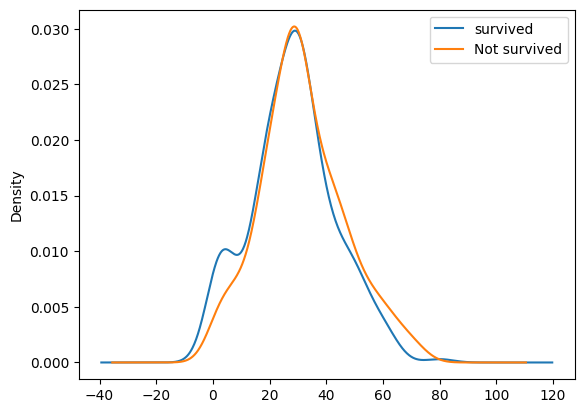

In [319]:
#survived and age - one is numerical col other is categorical col 
df[df['Survived'] ==1 ]['Age'].plot(kind='kde',label='survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not survived')
plt.legend()
plt.show()